In [94]:
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.ensemble import VotingClassifier
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Bidirectional, LSTM, Dense
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
from gensim.models import KeyedVectors
from keras.utils import to_categorical
from tensorflow.keras.layers import Embedding
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression
import seaborn as sns
import re
import gensim
from keras.models import Sequential,load_model
from keras.models import Model
from keras.layers import Input, Dense, Dropout, Flatten, Conv1D, MaxPooling1D, concatenate
#from tensorflow.keras.layers import Embedding
from keras.preprocessing.text import Tokenizer

In [95]:
# Load data
#data=open("hate-by-Kabada.csv", errors='ignore')
#df = pd.read_csv('hate-by-Kabada.csv')
#,count,hate_speech,offensive_language,neither,class,tweet
# Preprocess data
path = "C:\\Users\\Moti\Desktop\\Intent\\Meliha Research\\maliha_dataset_researchs.xlsx"
data=pd.read_excel(path, names=['Text','Intent'])
data.sample(frac=1).reset_index(drop=True)
print(data.shape)
data.head()

(14642, 2)


,Text,Intent
0,Kiyyoo dirama oso eguti jirun na darbe tari a...,Question
1,Meeti ree kuta 28ffaa,Question
2,Kutaa digdami sadetaffa isiin egee dadhabee.,Negative
3,Kutaa digdami sadetaffaa fiidagaa maali nuuraa...,Negative
4,Nuuf jabbadhakaa warii Akka kotti kiyyoo jaala...,Positive


<AxesSubplot:xlabel='Intent', ylabel='count'>

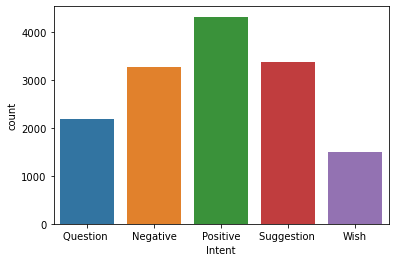

In [96]:
sns.countplot(x='Intent', data=data)

In [98]:
data["Intent"].value_counts()
#print(len('Gosa_miira'))
#print(len('jechoota'))

Positive       4320
Suggestion     3370
Negative       3271
Question       2181
Wish           1498
Name: Intent, dtype: int64

In [101]:
data['Text'].apply(lambda x: x.lower())

0        kiyyoo dirama oso  eguti jirun na darbe tari a...
1                                    meeti ree kuta 28ffaa
2             kutaa digdami sadetaffa isiin egee dadhabee.
3        kutaa digdami sadetaffaa fiidagaa maali nuuraa...
4        nuuf jabbadhakaa warii akka kotti kiyyoo jaala...
                               ...                        
14637     kuusaan bishaanii hidhichaan uumamu jallisii ...
14638    pirojektichi kallattiin ijaarsaa fi hojiidhaan...
14639     hidhichi itiyoophiyaaf gara walabummaa anniis...
14640     pirojektichi dandeettii teeknooloojii fi dand...
14641    hidhichi biyyoota ollaatiif humna ibsaa kennuu...
Name: Text, Length: 14642, dtype: object

In [102]:
y = data['Intent']

In [103]:
def preprocess_text(sen):
    # Removing html tags
    sentence = remove_tags(sen)
    # Remove punctuations and numbers
    sentence = re.sub('[^a-zA-Z]', ' ', sentence)
    # Single character removal
    sentence = re.sub(r"\s+[a-zA-Z]\s+", ' ', sentence)
    # Removing multiple spaces
    sentence = re.sub(r'\s+', ' ', sentence)
    sentence = sen.lower()
    sentence = re.sub(r'wo*w','wow', sentence)
    sentence = re.sub(r'uu*f','uff', sentence)
    return sentence
TAG_RE = re.compile(r'<[^>]+>')
def remove_tags(Text):
    return TAG_RE.sub('', Text)

In [104]:
X = preprocess_text(str(data[['Text']]))

In [105]:
from nltk.tokenize import word_tokenize

data['tokenized'] = data['Text'].apply(word_tokenize)
data.head()

,Text,Intent,tokenized
0,Kiyyoo dirama oso eguti jirun na darbe tari a...,Question,"[Kiyyoo, dirama, oso, eguti, jirun, na, darbe,..."
1,Meeti ree kuta 28ffaa,Question,"[Meeti, ree, kuta, 28ffaa]"
2,Kutaa digdami sadetaffa isiin egee dadhabee.,Negative,"[Kutaa, digdami, sadetaffa, isiin, egee, dadha..."
3,Kutaa digdami sadetaffaa fiidagaa maali nuuraa...,Negative,"[Kutaa, digdami, sadetaffaa, fiidagaa, maali, ..."
4,Nuuf jabbadhakaa warii Akka kotti kiyyoo jaala...,Positive,"[Nuuf, jabbadhakaa, warii, Akka, kotti, kiyyoo..."


In [116]:
stopword = pd.read_csv('AOstopwordlist.csv')

In [117]:
stopword.head()

,stopwords
0,kiyyoo
1,ffaan
2,aanee
3,abba
4,abbaan


In [119]:
data['stopwords_removed'] = data['tokenized'].apply(lambda x: [word for word in x if word not in stopword])
data.head(10)

,Text,Intent,tokenized,stopwords_removed
0,Kiyyoo dirama oso eguti jirun na darbe tari a...,Question,"[Kiyyoo, dirama, oso, eguti, jirun, na, darbe,...","[Kiyyoo, dirama, oso, eguti, jirun, na, darbe,..."
1,Meeti ree kuta 28ffaa,Question,"[Meeti, ree, kuta, 28ffaa]","[Meeti, ree, kuta, 28ffaa]"
2,Kutaa digdami sadetaffa isiin egee dadhabee.,Negative,"[Kutaa, digdami, sadetaffa, isiin, egee, dadha...","[Kutaa, digdami, sadetaffa, isiin, egee, dadha..."
3,Kutaa digdami sadetaffaa fiidagaa maali nuuraa...,Negative,"[Kutaa, digdami, sadetaffaa, fiidagaa, maali, ...","[Kutaa, digdami, sadetaffaa, fiidagaa, maali, ..."
4,Nuuf jabbadhakaa warii Akka kotti kiyyoo jaala...,Positive,"[Nuuf, jabbadhakaa, warii, Akka, kotti, kiyyoo...","[Nuuf, jabbadhakaa, warii, Akka, kotti, kiyyoo..."
5,Bayyee namatti tola itti fufa gariidha,Positive,"[Bayyee, namatti, tola, itti, fufa, gariidha]","[Bayyee, namatti, tola, itti, fufa, gariidha]"
6,Diraamichi torbetti yeroo lamaa nuuf dhiyaachu...,Suggestion,"[Diraamichi, torbetti, yeroo, lamaa, nuuf, dhi...","[Diraamichi, torbetti, yeroo, lamaa, nuuf, dhi..."
7,Ani dhugaa dubbachuuf baayyeen diraamaa kana j...,Positive,"[Ani, dhugaa, dubbachuuf, baayyeen, diraamaa, ...","[Ani, dhugaa, dubbachuuf, baayyeen, diraamaa, ..."
8,Maliif nurraa turtan garuu?,Question,"[Maliif, nurraa, turtan, garuu, ?]","[Maliif, nurraa, turtan, garuu, ?]"
9,Waan ajaaibatti,Positive,"[Waan, ajaaibatti]","[Waan, ajaaibatti]"


In [109]:
tokenizer=Tokenizer(num_words=20000,split=" ")
tokenizer.fit_on_texts(data['stopwords_removed'].values)
x=tokenizer.texts_to_sequences(data['stopwords_removed'].values)
x=pad_sequences(x)
x[:5]

array([[   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,  282, 2643,
        3827, 7478, 7479,   65,  275, 7480, 7481,  115,  475, 7482, 7483],
       [   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0, 4051,  367, 4052, 7484],
       [   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0

In [110]:
y=pd.get_dummies(data['Intent']).values
[print(data['Intent'][i],y[i]) for i in range(0,5)]

Question  [0 0 1 0 0]
Question  [0 0 1 0 0]
Negative [1 0 0 0 0]
Negative [1 0 0 0 0]
Positive [0 1 0 0 0]


[None, None, None, None, None]

In [111]:
y.shape

(14642, 5)

In [112]:
x.shape

(14642, 55)

In [113]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.1, random_state=0)

In [114]:
x_train.shape

(13177, 55)

In [115]:
y_train.shape

(13177, 5)

In [64]:
model = Sequential()
model.add(Embedding(12000, 64, input_length=x.shape[1]))
model.add(Dropout(0.3))
model.add(Bidirectional(LSTM(150, return_sequences=True, dropout=0.3, recurrent_dropout=0.2)))
model.add(Bidirectional(LSTM(100, dropout=0.5, recurrent_dropout=0.3)))
#model.add(LSTM(128, dropout=0.2, recurrent_dropout=0.3))
model.add(Dense(5, activation = 'softmax'))

# Step 4: Stacked LSTM Model
#stacked_lstm_model = Sequential()
#stacked_lstm_model.add(Embedding(50529, 300, weights=[embedding_matrix], input_length=711, trainable=False))
#stacked_lstm_model.add(LSTM(100, return_sequences=True))
#stacked_lstm_model.add(LSTM(50))0
#stacked_lstm_model.add(Dense(5, activation='softmax'))
#stacked_lstm_model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [65]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [66]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 55, 64)            768000    
                                                                 
 dropout_1 (Dropout)         (None, 55, 64)            0         
                                                                 
 bidirectional_2 (Bidirectio  (None, 55, 300)          258000    
 nal)                                                            
                                                                 
 bidirectional_3 (Bidirectio  (None, 200)              320800    
 nal)                                                            
                                                                 
 dense_1 (Dense)             (None, 5)                 1005      
                                                                 
Total params: 1,347,805
Trainable params: 1,347,805
No

In [67]:
history = model.fit(x_train, y_train, epochs=30, batch_size=64,validation_split=0.1)

Epoch 1/30
134/134 [==============================] - 349s 2s/step - loss: 1.1381 - accuracy: 0.5165 - val_loss: 0.6989 - val_accuracy: 0.7434
Epoch 2/30
134/134 [==============================] - 281s 2s/step - loss: 0.5263 - accuracy: 0.8167 - val_loss: 0.4602 - val_accuracy: 0.8465
Epoch 3/30
134/134 [==============================] - 275s 2s/step - loss: 0.3057 - accuracy: 0.9005 - val_loss: 0.4092 - val_accuracy: 0.8686
Epoch 4/30
134/134 [==============================] - 263s 2s/step - loss: 0.2162 - accuracy: 0.9262 - val_loss: 0.3780 - val_accuracy: 0.8707
Epoch 5/30
134/134 [==============================] - 261s 2s/step - loss: 0.1757 - accuracy: 0.9365 - val_loss: 0.3649 - val_accuracy: 0.8780
Epoch 6/30
134/134 [==============================] - 270s 2s/step - loss: 0.1478 - accuracy: 0.9449 - val_loss: 0.3490 - val_accuracy: 0.8759
Epoch 7/30
134/134 [==============================] - 264s 2s/step - loss: 0.1256 - accuracy: 0.9511 - val_loss: 0.3472 - val_accuracy: 0.8801

In [68]:
import matplotlib.pyplot as plt

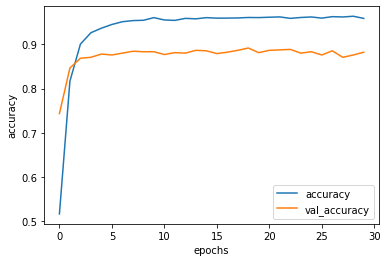

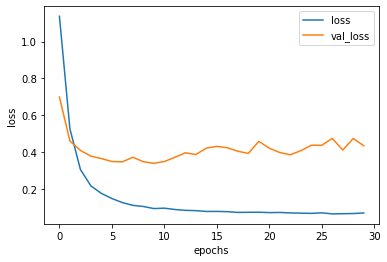

In [69]:
def plot_graphs(history, string):
    plt.plot(history.history[string])
    plt.plot(history.history['val_'+string])
    plt.xlabel("epochs")
    plt.ylabel(string)
    plt.legend([string, 'val_'+string])
    plt.show()
plot_graphs(history, "accuracy")
plot_graphs(history, "loss")

In [70]:
model.save('bilstm_model_weights.h5')

In [71]:
predictions = model.predict(x_test)

34/34 [==============================] - 24s 601ms/step


In [72]:
from sklearn import metrics
from sklearn.metrics import accuracy_score, confusion_matrix, precision_recall_fscore_support

In [73]:
cm=metrics.confusion_matrix(y_test.argmax(axis=1), predictions.argmax(axis=1))

In [74]:
FP = cm.sum(axis=0) - np.diag(cm)  
FN = cm.sum(axis=1) - np.diag(cm)
TP = np.diag(cm)
TN = cm.sum() - (FP + FN + TP)

In [75]:
FP = FP.astype(float)
FN = FN.astype(float)
TP = TP.astype(float)
TN = TN.astype(float)

In [76]:
print(FP)
print(FN)
print(TP)
print(TN)

[35. 34.  1. 32. 20.]
[24. 47.  8. 33. 10.]
[325. 382.  74. 114.  40.]
[673. 594. 974. 878. 987.]


In [77]:
accuracy=(TP+TN)/(TP+TN+FP+FN)
precision = TP/(TP+FP)
recall = TP/(TP+FN)
f1_score = 2*precision*recall/(precision+recall)

In [78]:
print("recall  ", recall)
print("precision",precision)
print("f1_score",f1_score)

recall   [0.93123209 0.89044289 0.90243902 0.7755102  0.8       ]
precision [0.90277778 0.91826923 0.98666667 0.78082192 0.66666667]
f1_score [0.9167842  0.90414201 0.94267516 0.778157   0.72727273]


In [79]:
def accuracy(confusion_matrix):
    diagonal_sum = confusion_matrix.trace()
    sum_of_all_elements = confusion_matrix.sum()
    return diagonal_sum / sum_of_all_elements 

In [80]:
accuracy(cm)

0.8845789971617786

In [89]:
new_intent = ['Kutaa digdami sadetaffa isiin egee dadhabee']
seq = tokenizer.texts_to_sequences(new_intent)
padded = pad_sequences(seq, maxlen=6000)
pred = model.predict(padded)
classes = ['Positive','Negative','Question','Suggestion','Wish']
#Intent = ['Question', 'Negative', 'Positive', 'Suggestion', 'Wish']
print(pred, classes[np.argmax(pred)])

1/1 [==============================] - 11s 11s/step
[[9.9994910e-01 2.6113703e-05 2.9842840e-07 1.6781429e-05 7.6574224e-06]] Positive


In [86]:
[print (data['Text'][i], predictions[i], y_test[i]) for i in range(0, 400)]

Kiyyoo dirama oso  eguti jirun na darbe tari ayaana moo sababa godhatu moyuu [9.9996042e-01 2.8285260e-05 7.6801662e-08 7.4781046e-06 3.7094294e-06] [1 0 0 0 0]
Meeti ree kuta 28ffaa [2.4090443e-05 3.8464415e-05 9.9991918e-01 9.3608323e-06 8.9549585e-06] [0 0 1 0 0]
Kutaa digdami sadetaffa isiin egee dadhabee. [4.2297295e-05 9.9978060e-01 1.8964765e-05 1.4732136e-04 1.0817325e-05] [0 1 0 0 0]
Kutaa digdami sadetaffaa fiidagaa maali nuuraa tuursiftaani bar ani 1faa haanga 27faa haarfoofan tuuree [0.7850593  0.15453489 0.03659513 0.01593474 0.0078759 ] [0 1 0 0 0]
Nuuf jabbadhakaa warii Akka kotti kiyyoo jaalatan  [9.9996805e-01 2.0003899e-05 7.4086032e-08 8.3662671e-06 3.5083015e-06] [1 0 0 0 0]
Bayyee namatti tola itti fufa gariidha  [4.4886761e-05 9.9990094e-01 7.5671173e-06 4.0267325e-05 6.2777535e-06] [0 1 0 0 0]
Diraamichi torbetti yeroo lamaa nuuf dhiyaachuu qaba [1.7092987e-04 9.9941373e-01 3.3011962e-05 3.2439883e-04 5.7860492e-05] [0 1 0 0 0]
Ani dhugaa dubbachuuf baayyeen dira

Anatuu jalqabaa lallee  [9.9993646e-01 3.7970211e-05 2.0306123e-07 1.9760457e-05 5.5733740e-06] [1 0 0 0 0]
Torbee darbee essatii haaftan [0.14486757 0.51871365 0.02112165 0.10232454 0.21297258] [1 0 0 0 0]
malif hin dhufin sanbata taree [2.2344593e-05 9.9994850e-01 4.2987704e-06 2.2759479e-05 2.0342081e-06] [0 1 0 0 0]
Mee namnii akka koo hawwiidhan eegata turtan essa jirtuu [5.0054537e-04 9.9941432e-01 1.0188727e-05 6.1173771e-05 1.3858374e-05] [0 1 0 0 0]
Haaradha Namni tokko nan Dursinee [1.22602914e-05 2.34126037e-05 9.99940991e-01 1.15924558e-05
 1.17249665e-05] [0 0 1 0 0]
 Anaa dhufuu  Diramaa kiyyoo  [9.9994373e-01 2.3532675e-05 4.3689005e-07 1.9484914e-05 1.2720000e-05] [1 0 0 0 0]
An dhufuu kabajamoota keenyaa matii kiyyoo [9.9996877e-01 1.7659959e-05 7.2567957e-08 9.8355949e-06 3.6316053e-06] [1 0 0 0 0]
Anaa dhufuu qopheesitoota diraama Kiyyoo [1.9976338e-05 4.6798617e-01 4.3945369e-05 5.3166807e-01 2.8187965e-04] [0 0 0 1 0]
Maaf torbee Darbee nuraa haftanii osso isinii e

Hedduu isin jaaladhaa   [9.9987435e-01 4.7273166e-05 9.4417607e-07 4.5770943e-05 3.1602089e-05] [1 0 0 0 0]
Akka ko sifuu kan jaalatu jira [9.9990070e-01 6.3092361e-05 3.4742635e-07 2.2086564e-05 1.3750398e-05] [1 0 0 0 0]
Diraamaa kiyyoo baga nagaa nuuf dhuftan torbee tokko ji'a tokko nattii ta'ee dhugaa  [8.3294828e-05 9.9983740e-01 1.1575525e-05 5.9677051e-05 8.0378077e-06] [0 1 0 0 0]
Woyii obolesaa koo dharii kee akumaa yaroo ijolumatii jiraa [9.9444228e-01 4.0809959e-03 4.3389802e-05 1.1914299e-03 2.4197220e-04] [0 1 0 0 0]
Baayyee natti tolee dhugaa [1.8946328e-05 9.9977583e-01 9.2525133e-06 1.9008921e-04 5.8680339e-06] [0 1 0 0 0]
Isiin Egaan turre dhuga maalif turtanii [1.8975828e-04 9.9973768e-01 9.5707592e-06 5.2413809e-05 1.0489632e-05] [0 1 0 0 0]
Isiin Egan turre dhuga rabbii akkan isiin jaalladhu rabbiin ragaa qaba [1.5096285e-04 7.3170519e-01 3.5547628e-04 2.6614144e-01 1.6468808e-03] [0 1 0 0 0]
Baga nagaan dhuftan matii diraamaa kiyyoo  [0.4424473  0.42771703 0.014448

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,

In [87]:
# Make predictions with your BiLSTM model
from sklearn.metrics import classification_report
Wy_pred = model.predict(x_test)
y_pred_classes = predictions.argmax(axis=1)  # Assuming you have a multi-class classification problem

# Convert true labels to classes (if they are in one-hot encoded format)
y_true_classes = y_test.argmax(axis=1)



34/34 [==============================] - 17s 498ms/step


In [88]:
# Generate the classification report
report = classification_report(y_true_classes, y_pred_classes, target_names = classes)

# Print the classification report
print(report)

              precision    recall  f1-score   support

    Positive       0.90      0.93      0.92       349
    Negative       0.92      0.89      0.90       429
    Question       0.99      0.90      0.94        82
  Suggestion       0.78      0.78      0.78       147
        Wish       0.67      0.80      0.73        50

    accuracy                           0.88      1057
   macro avg       0.85      0.86      0.85      1057
weighted avg       0.89      0.88      0.89      1057

